<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/WhatsApp_Chat_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [15]:
!pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import regex 
import pandas as pd
import numpy as np 
import emoji 
from collections import Counter 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [5]:
data = [] 
conversation = '/content/drive/MyDrive/Colab Notebooks/WhatsApp Chat with Mamor.txt'
with open(conversation, encoding="utf-8") as fp:
  fp.readline()
  messageBuffer = []
  date, time, author = None, None, None 
  while True:
    line = fp.readline() 
    if not line:
      break
    line = line.strip()
    if date_time(line):
      if len(messageBuffer) > 0:
        data.append([date, time, author, ' '.join(messageBuffer)])
      messageBuffer.clear()
      date, time, author, message = getDatapoint(line)
      messageBuffer.append(message)
    else:
      messageBuffer.append(line)      

In [6]:
df = pd.DataFrame(data, columns=["Date", "Time", "Author", "Message"])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

            Date   Time            Author  \
32692 2022-08-09  16:44  Daniel Rodríguez   
32693 2022-08-09  16:50             Mamor   
32694 2022-08-09  16:53  Daniel Rodríguez   
32695 2022-08-09  16:54  Daniel Rodríguez   
32696 2022-08-09  16:54             Mamor   
32697 2022-08-09  16:54             Mamor   
32698 2022-08-09  16:55  Daniel Rodríguez   
32699 2022-08-09  16:55             Mamor   
32700 2022-08-09  16:56             Mamor   
32701 2022-08-09  16:56             Mamor   
32702 2022-08-09  16:56  Daniel Rodríguez   
32703 2022-08-09  16:57  Daniel Rodríguez   
32704 2022-08-09  16:57  Daniel Rodríguez   
32705 2022-08-09  16:57             Mamor   
32706 2022-08-09  16:57             Mamor   
32707 2022-08-09  16:57             Mamor   
32708 2022-08-09  16:58  Daniel Rodríguez   
32709 2022-08-09  18:21             Mamor   
32710 2022-08-09  18:26  Daniel Rodríguez   
32711 2022-08-09  18:32             Mamor   

                                                 Messa

In [7]:
total_messages = df.shape[0]
print(total_messages)

32712


In [8]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0] 
print(media_messages)

4187


In [18]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['es'] for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

In [13]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len() 
links = np.sum(df.urlcount) 

print("Chats between Daniel and Mamor")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Links Shared", links)

Chats between Daniel and Mamor
Total Messages:  32712
Number of Media Shared:  4187
Number of Links Shared 236


In [20]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index) 
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s)) 
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessagesCount"] = 1

l = ["Daniel", "Mamor"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of Daniel -
Messages Sent 0
Average Words per message nan
Media Messages Sent 0
Links Sent 0
Stats of Mamor -
Messages Sent 15882
Average Words per message 3.8571338622339755
Media Messages Sent 2747
Links Sent 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()


There are 654281 words in all the messages.


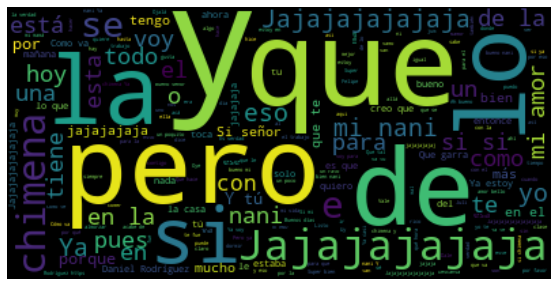

In [21]:
text = " ".join(review for review in messages_df.Message) 
print("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
l = ["Daniel", "Chimena"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  print('Author name', l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation ='bilinear')
  plt.axis("off")
  plt.show()



Author name Daniel


ValueError: ignored